## p17 to p27

### p17

In [1]:
import torch
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPModel
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
device='cuda'

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [14]:
image = Image.open('me_no_hat_cropped_1.jpeg')
text = "A photo of a man"
# image

In [9]:
inputs = processor(images=image, return_tensors="pt").to(device)
with torch.no_grad():
    image_features = model.get_image_features(**inputs)
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)

In [13]:
image_features[0,:10], image_features.shape

(tensor([ 0.0362, -0.0020, -0.0347,  0.0297, -0.0321, -0.0230,  0.0156,  0.0808,
          0.0237,  0.0073], device='cuda:0'),
 torch.Size([1, 512]))

In [15]:
inputs = processor(text=text, return_tensors="pt", padding=True).to(device)
with torch.no_grad():
    text_features = model.get_text_features(**inputs)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

In [16]:
text_features[0,:10], text_features.shape

(tensor([-0.0235,  0.0288, -0.0020,  0.0181, -0.0009, -0.0264, -0.0124, -0.0950,
         -0.0009,  0.0272], device='cuda:0'),
 torch.Size([1, 512]))

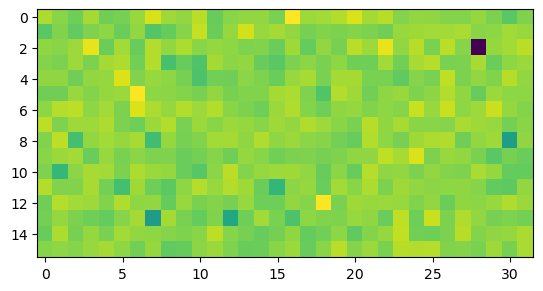

In [18]:
plt.imshow(image_features.detach().cpu().numpy().reshape(16,32))